In [1]:
%matplotlib inline

In [144]:
import itertools 

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import numpy as np

from papercolors import colordict as pcd

In [18]:
mpatches.Circle?

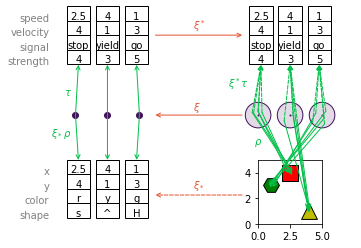

In [368]:
fig, axd = plt.subplot_mosaic([['tau', 'tau_pull'], ['k', 's'], ['rho_push', 'rho']])
x = [-0, .5, 1]
y = [.5]*len(x)
# K
axd['k'].scatter(x,y, color=pcd['base'])
axd['k'].axis('off')
axd['k'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))

#S
radius = .2
axd['s'].scatter(x,y, color=pcd['base'], s=1)
[axd['s'].add_patch(mpatches.Circle((xi,yi), radius=radius, edgecolor=pcd['base'], 
                                    facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))
                     for xi, yi in zip(x, y)]
axd['s'].axis('off')
axd['s'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))

# tau 
d = [{'speed':2.5, 'velocity':4 ,'signal':'stop', 'strength':4, 'color': 'r', 'shape': 's'}, 
     {'speed':4, 'velocity':1 , 'signal':'yield', 'strength':3, 'color': 'y', 'shape': '^'},
     {'speed':1, 'velocity':3 ,'signal':'go', 'strength':5, 'color':'g', 'shape': 'H'}]   


rows = ['speed', 'velocity', 'signal', 'strength'][::-1]
for axn in ['tau', 'tau_pull']:
    for i, r in enumerate(rows):
        if axn =='tau':
            axd[axn].annotate(r, (-.5, i/len(rows)), ha='right', fontsize=10, color='gray')
        for xi, di in zip(x,d):
            axd[axn].annotate(di[r],(xi, i/len(rows)), ha='center', va='bottom', fontsize=10)
            axd[axn].add_patch(mpatches.Rectangle((xi-.2, i/len(rows)), .4, 1/len(rows), 
                                 facecolor='white', edgecolor='k'))


    axd[axn].set(xlim=(-.5, 1.5), ylim=(-.1,1), aspect='equal')

    axd[axn].axis('off')

for xi, yi, di in zip(x,y,d):
    axd['rho'].scatter(di['speed'], di['velocity'],c=di['color'], marker=di['shape'], s=250, edgecolor='k')
axd['rho'].set(xlim=(0, 5), ylim=(0,5), aspect='equal')


for i, r in enumerate(['speed', 'velocity', 'color', 'shape'][::-1]):
    if r == 'speed':
        s = 'x'
    elif r == 'velocity':
        s = 'y'
    else:
        s = r
    axd['rho_push'].annotate(s, (-.5, i/len(rows)), ha='right', fontsize=10, color='gray')
    for xi, di in zip(x,d):
        axd['rho_push'].annotate(di[r],(xi, i/len(rows)), ha='center', va='bottom', fontsize=10)
        axd['rho_push'].add_patch(mpatches.Rectangle((xi-.2, i/len(rows)), .4, 1/len(rows), 
                             facecolor='white', edgecolor='k'))

axd['rho_push'].axis('off')
axd['rho_push'].set(xlim=(-.5, 1.5), ylim=(-.1,1), aspect='equal')

for i, xi in enumerate(x):
    at = mpatches.ConnectionPatch((xi,.5), (xi, -.005), 
                                  coordsA=axd['k'].transData, coordsB=axd['tau'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    arp = mpatches.ConnectionPatch((xi,.5), (xi, 1), 
                                  coordsA=axd['k'].transData, coordsB=axd['rho_push'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    fig.add_artist(at)
    fig.add_artist(arp)
    
    margin = .2
    xt = np.random.uniform(low = d[i]['speed']-margin, high = d[i]['speed']+margin, size=10)
    yt = np.random.uniform(low = d[i]['velocity']-margin, high = d[i]['velocity']+margin, size=10)
    for j, (xs,ys) in enumerate(zip(np.random.uniform(low=xi-radius+.05, high=xi+radius-.05, size=5),
                       np.random.uniform(low=.5-radius+.05, high=.5+radius-.05, size=5))):
        atp = mpatches.ConnectionPatch((xs,ys), (xi, -.005), 
                                  coordsA=axd['s'].transData, coordsB=axd['tau_pull'].transData,
                                  color=pcd['section'], arrowstyle="->",linestyle='--')
       
        ar = mpatches.ConnectionPatch((xs,ys), (xt[j], yt[j]), 
                                  coordsA=axd['s'].transData, coordsB=axd['rho'].transData,
                                  color=pcd['section'], arrowstyle="->",)
        fig.add_artist(atp)
        fig.add_artist(ar)  

fig.text(.2, .57, r'$\tau$', color=pcd['section'])
fig.text(.17, .43, r'$\xi_*\rho$', color=pcd['section'])
fig.text(.58, .6, r'$\xi^*\tau$', color=pcd['section'])
fig.text(.64, .4, r'$\rho$', color=pcd['section'])
        
fig.text(.5, .25, r"$\xi_*$", color=pcd['functor'])
push = mpatches.ConnectionPatch((-.25,-.75), (1.25, -.75), 
                                  coordsA=axd['s'].transData, coordsB=axd['k'].transData,
                                  color=pcd['functor'], arrowstyle="->",linestyle='--')
fig.add_artist(push)

fig.text(.5, .8, r"$\xi^*$", color=pcd['functor'])
pull = mpatches.ConnectionPatch((1.25, 1.75), (-.25, 1.75), 
                                  coordsA=axd['k'].transData, coordsB=axd['s'].transData,
                                  color=pcd['functor'], arrowstyle="->")
fig.add_artist(pull)
fig.text(.5, .52, r"$\xi$", color=pcd['functor'])
vind = mpatches.ConnectionPatch((-.25,.5), (1.25, .5), 
                                  coordsA=axd['s'].transData, coordsB=axd['k'].transData,
                                  color=pcd['functor'], arrowstyle="->")
fig.add_artist(vind)
    
fig.savefig('../figures/xi_scatter.png')

In [257]:
mpatches.ConnectionPatch?

In [272]:
xi-radius

0.8

In [304]:
len(d)

3